In [12]:
import seaborn as sns
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
id = 9
nnulls = 500

In [26]:
## Load homogeneous and myelinmap results
hmap_labels = ["None", "myelinmap"]
edge_fc_model, node_fc_model, fcd_model, obj_model = {}, {}, {}, {}
for hmap_label in hmap_labels:
    file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results.hdf5"

    with h5py.File(file, 'r') as f:
        edge_fc_model[hmap_label] = np.mean(np.array(f['edge_fc_test'][:]).flatten())
        node_fc_model[hmap_label] = np.mean(np.array(f['node_fc_test'][:]).flatten())
        fcd_model[hmap_label] = np.mean(np.array(f['fcd_test'][:]).flatten())
        obj_model[hmap_label] = np.mean(np.array(f['combined_metric_test'][:]).flatten())

## Load null results
edge_fc_null, node_fc_null, fcd_null, obj_null = [], [], [], []
# Loop through null files
for i in range(nnulls):
    # Append edge fc, node fc and fcd
    file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/nulls/null-{i}_results.hdf5"

    with h5py.File(file, 'r') as f:
        edge_fc_null.append(np.mean(np.array(f['edge_fc_test'][:]).flatten()))
        node_fc_null.append(np.mean(np.array(f['node_fc_test'][:]).flatten()))
        fcd_null.append(np.mean(np.array(f['fcd_test'][:]).flatten()))
        obj_null.append(np.mean(np.array(f['combined_metric_test'][:]).flatten()))
        
# Convert to numpy arrays and average across runs/folds (each row)
edge_fc_null = np.array(edge_fc_null)
node_fc_null = np.array(node_fc_null)
fcd_null = np.array(fcd_null)
obj_null = np.array(obj_null)

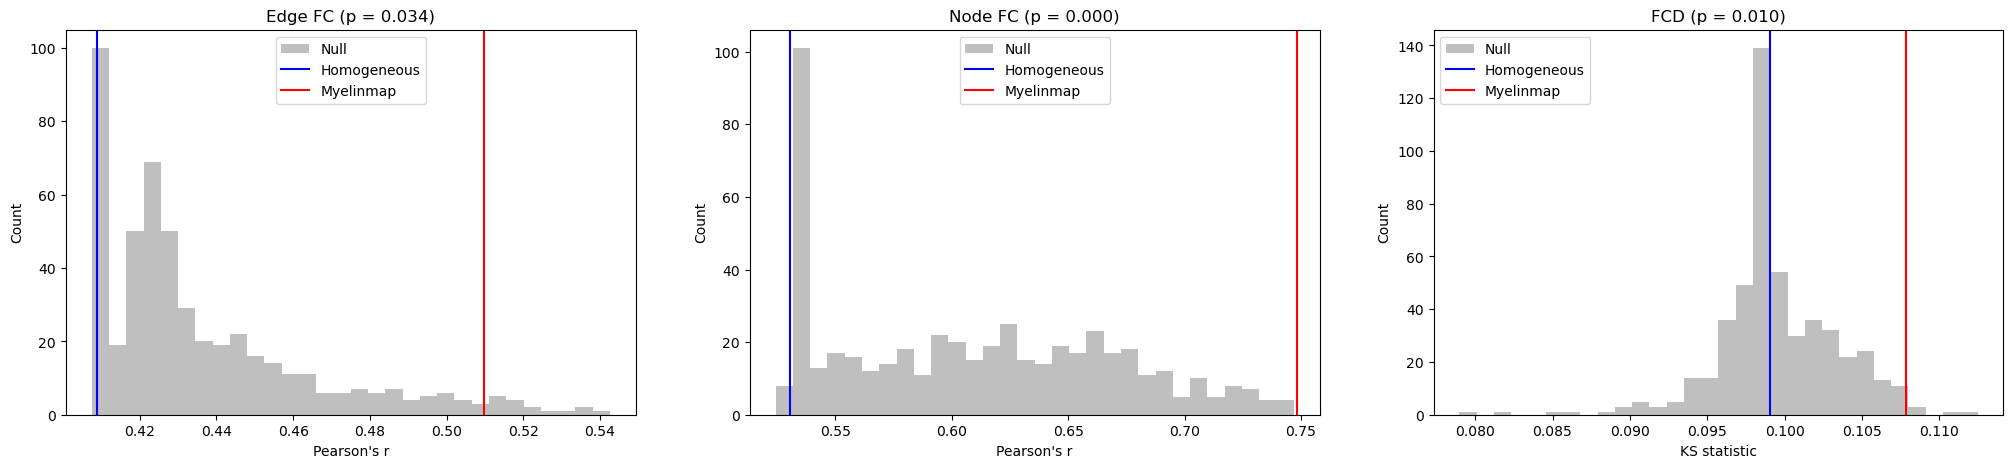

In [32]:
# Plot distributions of edge fc, node fc and fcd. Plot vertical line marking homogeneous and myelinmap models
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

p_edge = np.sum(edge_fc_null > edge_fc_model["myelinmap"]) / len(edge_fc_null)
axs[0].hist(edge_fc_null, bins=30, alpha=0.5, color='gray', label='Null')
axs[0].axvline(edge_fc_model["None"], color='blue', label='Homogeneous')
axs[0].axvline(edge_fc_model["myelinmap"], color='red', label='Myelinmap')
axs[0].set_title(f"Edge FC (p = {p_edge:.3f})")
axs[0].set_xlabel("Pearson's r")
axs[0].set_ylabel("Count")
axs[0].legend()

p_node = np.sum(node_fc_null > node_fc_model["myelinmap"]) / len(node_fc_null)
axs[1].hist(node_fc_null.flatten(), bins=30, alpha=0.5, color='gray', label='Null')
axs[1].axvline(node_fc_model["None"], color='blue', label='Homogeneous')
axs[1].axvline(node_fc_model["myelinmap"], color='red', label='Myelinmap')
axs[1].set_title(f"Node FC (p = {p_node:.3f})")
axs[1].set_xlabel("Pearson's r")
axs[1].set_ylabel("Count")
axs[1].legend()

p_fcd = np.sum(fcd_null > fcd_model["myelinmap"]) / len(fcd_null)
axs[2].hist(fcd_null, bins=30, alpha=0.5, color='gray', label='Null')
axs[2].axvline(fcd_model["None"], color='blue', label='Homogeneous')
axs[2].axvline(fcd_model["myelinmap"], color='red', label='Myelinmap')
axs[2].set_title(f"FCD (p = {p_fcd:.3f})")
axs[2].set_xlabel("KS statistic")
axs[2].set_ylabel("Count")
axs[2].legend()

Text(0.5, 1.0, 'Combined metric (p = 0.006)')

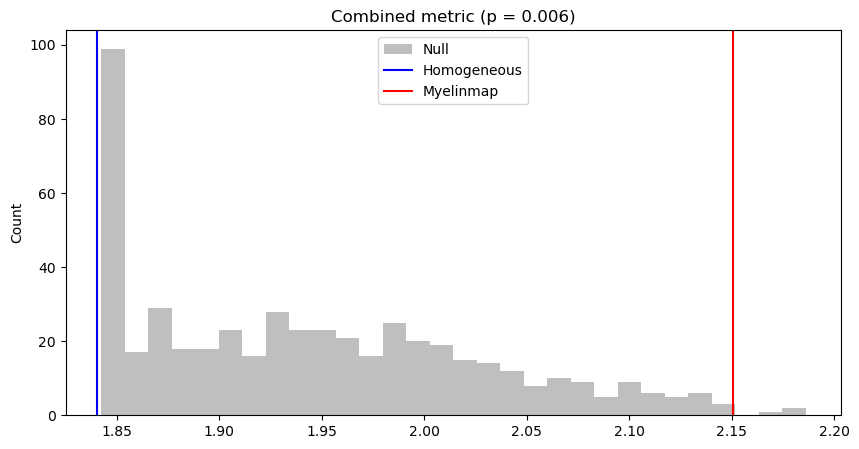

In [34]:
fig = plt.figure(figsize=(10, 5))

p_obj = np.sum(obj_null > obj_model["myelinmap"]) / len(obj_null)
plt.hist(obj_null.flatten(), bins=30, alpha=0.5, color='gray', label='Null')
plt.axvline(obj_model["None"], color='blue', label='Homogeneous')
plt.axvline(obj_model["myelinmap"], color='red', label='Myelinmap')
plt.ylabel("Count")
plt.legend()
plt.title(f"Combined metric (p = {p_obj:.3f})")